In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.MNIST)

In [3]:
path.ls()

(#2) [Path('/Users/ka37/.fastai/data/mnist_png/training'),Path('/Users/ka37/.fastai/data/mnist_png/testing')]

In [4]:
(path/'training').ls()

(#10) [Path('/Users/ka37/.fastai/data/mnist_png/training/9'),Path('/Users/ka37/.fastai/data/mnist_png/training/0'),Path('/Users/ka37/.fastai/data/mnist_png/training/7'),Path('/Users/ka37/.fastai/data/mnist_png/training/6'),Path('/Users/ka37/.fastai/data/mnist_png/training/1'),Path('/Users/ka37/.fastai/data/mnist_png/training/8'),Path('/Users/ka37/.fastai/data/mnist_png/training/4'),Path('/Users/ka37/.fastai/data/mnist_png/training/3'),Path('/Users/ka37/.fastai/data/mnist_png/training/2'),Path('/Users/ka37/.fastai/data/mnist_png/training/5')]

In [5]:
num_imgs_per = 100
items = L([
    p
    for s in ['training', 'testing']
    for digit in range(10)
    for p in (path/s/str(digit)).ls().shuffle()[:num_imgs_per]
])

In [6]:
items

(#2000) [Path('/Users/ka37/.fastai/data/mnist_png/training/0/47247.png'),Path('/Users/ka37/.fastai/data/mnist_png/training/0/51061.png'),Path('/Users/ka37/.fastai/data/mnist_png/training/0/27246.png'),Path('/Users/ka37/.fastai/data/mnist_png/training/0/9197.png'),Path('/Users/ka37/.fastai/data/mnist_png/training/0/55177.png'),Path('/Users/ka37/.fastai/data/mnist_png/training/0/16178.png'),Path('/Users/ka37/.fastai/data/mnist_png/training/0/26608.png'),Path('/Users/ka37/.fastai/data/mnist_png/training/0/2500.png'),Path('/Users/ka37/.fastai/data/mnist_png/training/0/6591.png'),Path('/Users/ka37/.fastai/data/mnist_png/training/0/26597.png')...]

In [49]:
block = DataBlock(
    blocks=(ImageBlock(PILImageBW), CategoryBlock),
    get_y=lambda x: int(parent_label(x)),
    splitter=GrandparentSplitter(train_name='training', valid_name="testing"),
)
dataloaders = block.dataloaders(items)
images, labels = dataloaders.one_batch()

In [34]:
learn_resnet = cnn_learner(dataloaders, resnet34)
learn_resnet.fine_tune(1)

epoch,train_loss,valid_loss,time
0,3.103264,1.831355,00:10


epoch,train_loss,valid_loss,time
0,1.771091,1.295984,00:20


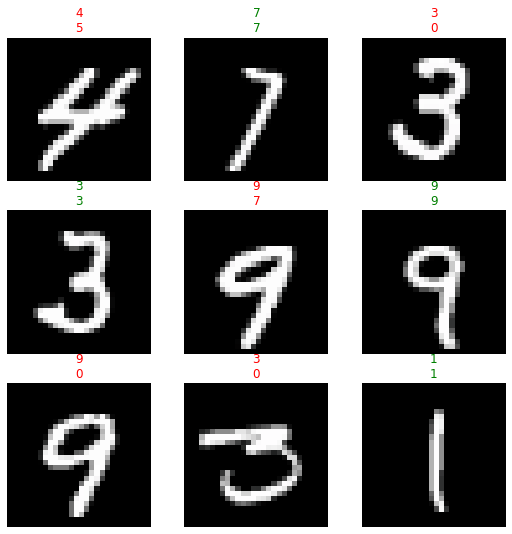

In [57]:
learn_resnet.show_results()

In [38]:
learn_resnet.model[-1][-1]

Linear(in_features=512, out_features=10, bias=False)

In [45]:
learn_resnet.dls.one_batch()[0]

TensorImageBW([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044, -1.

In [58]:
learn_resnet.model(learn_resnet.dls.one_batch()[0])

tensor([[ 1.1509e+00, -1.3979e+00, -6.3920e-04,  1.0200e+00,  1.2865e-03,
          3.0283e+00,  2.6304e+00, -2.5539e+00, -1.6134e+00, -3.0986e-01],
        [ 5.9521e+00, -1.8327e+00, -4.3282e-01, -1.6669e+00, -1.9991e+00,
         -8.4097e-02,  9.9448e-01,  3.7601e-01, -4.5734e-01,  6.8368e-02],
        [-1.3900e+00,  4.7280e+00,  2.0399e-01, -2.2097e+00,  1.4991e+00,
         -1.5031e+00, -9.1798e-01,  1.4454e+00, -9.8168e-01, -1.6067e+00],
        [ 6.0651e-01, -1.8219e+00,  2.5143e+00,  1.3941e+00,  3.2060e-02,
          3.8531e+00,  7.5869e-01,  5.2339e-01,  2.5526e+00, -6.9982e-01],
        [-2.2923e+00, -1.5975e+00,  3.6631e-01,  1.0671e+00,  9.2664e-01,
         -2.7637e+00, -1.7689e+00,  5.4804e-01,  4.0106e+00, -1.0430e+00],
        [ 3.8609e+00, -8.9013e-01, -5.2325e-01, -7.1236e-01, -1.1288e+00,
         -2.1210e+00, -1.4362e-01,  7.2493e-02, -1.0620e+00, -1.0613e+00],
        [-4.9359e-02, -2.0767e-01,  1.8723e+00,  6.6574e-01,  1.5598e+00,
          1.1004e+00, -1.2751e+0

In [18]:
images.shape

(64, 1, 28, 28)

In [19]:
flattener = nn.Flatten(start_dim=1)
flattener(images).shape

(64, 784)

In [20]:
labels


TensorCategory([7, 2, 2, 5, 8, 3, 6, 7, 1, 8, 9, 5, 7, 1, 1, 1, 4, 4, 1, 3, 2, 3, 6, 2,
        0, 7, 2, 5, 6, 6, 1, 7, 2, 5, 2, 7, 6, 1, 1, 8, 7, 3, 5, 0, 2, 1, 9, 5,
        6, 1, 5, 8, 6, 9, 4, 5, 1, 4, 4, 3, 0, 0, 3, 9])

In [50]:
model = nn.Sequential(
    nn.Flatten(start_dim=1),
    nn.Linear(784, 30),
    nn.ReLU(),
    nn.Linear(30, 10)
)

In [51]:
model(images).shape

torch.Size([64, 10])

In [55]:
cnn_learner??

Signature:
cnn_learner(
    dls,
    arch,
    normalize=True,
    n_out=None,
    pretrained=True,
    config=None,
    loss_func=None,
    opt_func=<function Adam at 0x7fd159f86c10>,
    lr=0.001,
    splitter=None,
    cbs=None,
    metrics=None,
    path=None,
    model_dir='models',
    wd=None,
    wd_bn_bias=False,
    train_bn=True,
    moms=(0.95, 0.85, 0.95),
    cut=None,
    n_in=3,
    init=<function kaiming_normal_ at 0x7fd174dd1940>,
    custom_head=None,
    concat_pool=True,
    lin_ftrs=None,
    ps=0.5,
    first_bn=True,
    bn_final=False,
    lin_first=False,
    y_range=None,
)
Source:   
@delegates(create_cnn_model)
def cnn_learner(dls, arch, normalize=True, n_out=None, pretrained=True, config=None,
                # learner args
                loss_func=None, opt_func=Adam, lr=defaults.lr, splitter=None, cbs=None, metrics=None, path=None,
                model_dir='models', wd=None, wd_bn_bias=False, train_bn=True, moms=(0.95,0.85,0.95),
                # othe

In [52]:
learn = Learner(dataloaders, model, loss_func=nn.CrossEntropyLoss(), metrics=error_rate)


epoch,train_loss,valid_loss,error_rate,time
0,2.299965,2.287530,0.896000,00:00
1,2.276945,2.225539,0.779000,00:00
2,2.222324,2.047329,0.634000,00:00
3,2.101280,1.728555,0.406000,00:00
4,1.910098,1.338856,0.238000,00:00
5,1.677360,1.026902,0.200000,00:00
6,1.449233,0.832486,0.178000,00:00
7,1.245516,0.710995,0.157000,00:00
8,1.073566,0.634525,0.145000,00:00
9,0.932754,0.585040,0.142000,00:00


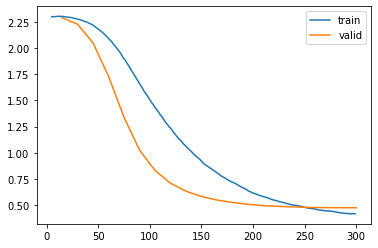

In [53]:
learn.fit_one_cycle(20)
learn.recorder.plot_loss()

In [59]:
learn.show_results??

Signature: learn.show_results(ds_idx=1, dl=None, max_n=9, shuffle=True, **kwargs)
Docstring: Show some predictions on `ds_idx`-th dataset or `dl`
Source:   
    def show_results(self, ds_idx=1, dl=None, max_n=9, shuffle=True, **kwargs):
        if dl is None: dl = self.dls[ds_idx].new(shuffle=shuffle)
        b = dl.one_batch()
        _,_,preds = self.get_preds(dl=[b], with_decoded=True)
        self.dls.show_results(b, preds, max_n=max_n, **kwargs)
File:      /usr/local/Caskroom/miniconda/base/envs/fastai/lib/python3.8/site-packages/fastai/learner.py
Type:      method
